# Project 2: The distribution of exoplanet eccentricities

### Assignment for ASTM29 Statistical Tools in Astrophysics
### PJM 2022-10-04 / AJM 2023, 2024

## Jupyter notebook

As a new approach in 2022, we are trying Jupyter notebook reports for two of the four projects in ASTM29 (Projects 2 & 4).

The project is described below. I also leave spaces for you to complete some of the work.

This takes the place of a written report. This Jupyter notebook should be completed by each student with code that does the tasks required and produces the required plots (either within the notebook or saved as files).

There is no need to re-write the elements of the method's section that are given, but details should be given where necessary to explain what the code is doing (preferably in the form of Markdown cells). Otherwise the assessment will be on similar grounds to those in other projects, e.g., clarity of diagrams, good readable code. Treat the notebook you hand in roughly as you would do a report, i.e., remove any rough work or unused code.

It is important that your notebook runs properly for the person marking it. Make sure this is the case by checking with "restart kernel and run all cells", and and only using relative paths to files$^{\bf 1}$.

Finally, your notebook will be graded based only on the code that is handed in, without expecting the examiner to make changes. So for example, if you want to show figures for different choices of a parameter, write code to make both and don't leave it to the examiner to change the value of the parameter and re-run a cell.


### Reporting/working on the project

Students are encouraged to discuss and work together on the project. However,
each student must fill in their version of this notebook with their own solution to the statistical tasks, 
results in the form of diagrams etc, and conclusions.


In [137]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt

# needed if using astropy
import astropy.table
import astropy.io.ascii

# Please place any further imports, or general commands to, e.g., make nicer plots here

from scipy.stats import beta as beta_class
from tqdm.auto import tqdm as tqdm
from scipy.stats import chi2 as chi2_class

## Introduction

In the last two decades a large number of exoplanets have been detected. The current
number of confirmed planets is above 3000. The sample is large enough, and the sampling 
function $^{\bf2}$ sufficiently well known, that multi-dimensional distributions of planet characteristics 
can be computed with some confidence, and might provide important clues to the 
general mechanisms of planet formation and evolution.

Much of the available data on exoplanets are readily accessible in on-line databases,
and the data used in this project was harvested from the *Exoplanet Data Explorer* 
in 2018. 



## Project

In this project we focus on the distribution of the orbital eccentricity for different 
ranges of orbital period. For simplicity we disregard selection effects entirely, and
we also assume that the beta distribution (see Jupyter notebook on common pdfs, 
or Chapter 3.3 of Ivezić et al.$^{\bf3}$) is a good model
for the distribution of eccentricity in a given range of period.

**The task is to use the Maximum Likelihood method to estimate the parameters 
($\alpha$, $\beta$) of the beta distribution from a list of eccentricities.  A 90% 
confidence region should also be calculated.**


## Data

The data file `ExoplanetsPeriodEcc.csv` contains a list of orbital periods ($P$, in days)
and eccentricities ($e$), and the associated uncertainties for all exoplanets discovered by the radial velocity (RV) method before 2018.

In [138]:
# Data file should be placed in the same folder as the notebook
data_raw = astropy.io.ascii.read('ExoplanetsPeriodEcc.csv') # 482 rows, 4 columns


# Student's work
## N.B. Below this point you need to start filling in code & text where prompted

*You will note that many of the planets have $e=0$. This does not mean that the orbit is
truly circular, only that the eccentricity is too small to be reliably measured. Use the
distribution of non-zero eccentricities (and perhaps the eccentricity uncertainties)
to estimate the typical minimum detectable eccentricity $e_\text{min}$. Then replace
all cases of $e=0$ by $e=e_\text{min}$.*

In [139]:
e_0_index=np.where(data_raw['ECC']==np.min(data_raw['ECC']))[0] # indexes with the e=0
e_min_index=np.where(data_raw['ECC']==np.min(data_raw['ECC'][data_raw['ECC']>0]))[0] # index with the e_min>0

In [140]:
data_raw['ECC'][e_0_index]=data_raw['ECC'][e_min_index] # replace e=0 with the e_min
data_raw['UECC'][e_0_index]=data_raw['UECC'][e_min_index] # replace sigma e=0 with the e_min sigma

*Suggest why we (mathematically) have to remove all cases with quoted e=0. Justify your choice of method for replacing them:*

All values with $e=0$ were replaced with $e_\text{min}=0.004$ because it was the lowest detectable values with an $\sigma_e = 0.003$. Kepler's first law forbids a perfectly circular orbit due to the non zero nature of the exoplanet's mass together with newton's second law. This allows for small masses eccentricities to be set to $e=0$ values. Furthermore having $e=0$ values could skew the distribution properties towards lower eccentitricity values. Creating a nonzero probability of finding a value with perfectly circular orbit when in reality it is simply artificially gerated due to detector sensitivity.

Further more, The Log likehood can be derived for a beta distribution in the following way:

The eccentricity is distributed according to 

$f(e \mid \alpha, \beta) = \frac{e^{\alpha - 1} (1 - e)^{\beta - 1}}{B(\alpha, \beta)}$

Where the beta function is given by

$B(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 - t)^{\beta - 1} \, dt = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$.

The likelihood is the multiplication of each of the eccentiricity measurements

$L(\alpha, \beta \mid e_1, e_2, \dots, e_n) = \prod_{i=1}^{n} f(e_i \mid \alpha, \beta)$.

Taking the natural logarithm and further simplifying

$\log{l}(\alpha, \beta \mid e_1, e_2, \dots, e_n) = \sum_{i=1}^{n} \ln f(e_i \mid \alpha, \beta)$


$\log{l}(\alpha, \beta) = \sum_{i=1}^{n} \left[ (\alpha - 1) \ln e_i + (\beta - 1) \ln(1 - e_i) - \ln B(\alpha, \beta) \right]$.

where the Beta function simplifies to

$ln B(\alpha, \beta) = \ln \Gamma(\alpha) + \ln \Gamma(\beta) - \ln \Gamma(\alpha + \beta)$.


Inserting the $ln B(\alpha, \beta)$ back gives

$\log{l}(\alpha, \beta) = (\alpha - 1) \sum_{i=1}^{n} \ln e_i + (\beta - 1) \sum_{i=1}^{n} \ln(1 - e_i) - n \ln B(\alpha, \beta)$.

The maximum of which occures when $\frac{\partial \log{l}(\alpha, \beta)}{\partial \alpha} = \frac{\partial \log{l}(\alpha, \beta)}{\partial \beta} =0$. The expressions for which are:

$\frac{\partial \log{l}(\alpha, \beta)}{\partial \alpha} = \sum_{i=1}^{n} \ln e_i - n \left( \psi(\alpha) - \psi(\alpha + \beta) \right)$


\
$\frac{\partial \log{l}(\alpha, \beta)}{\partial \beta} = \sum_{i=1}^{n} \ln(1 - e_i) - n \left( \psi(\beta) - \psi(\alpha + \beta) \right)$

where $\psi(x) = \frac{d}{dx} \ln \Gamma(x)$ is the Digammafunction.


It is to be noted that at $e=0$ the $ln(e)$ term is not defined and further is a reason to remove these values. 



# Calculations

*Select a range of periods $[P_{\rm min}, P_{\rm max}]$ that contains some 50–100 exoplanets. Calculate the log-likelihood l(α, β) for a range of parameter values.*

*You may assume for your calculations of the likelihood that the uncertainties of the eccentricity measurements are negligible*

*Typically, you need to explore $0 < \alpha \lesssim A$ and $0 < \beta \lesssim B$ in steps of 0.1 or less, where $A$ and $B$ may be 5 or more.   
Find the combination of parameter values that maximizes the log-likelihood and adopt this as your MLE  $(\hat{\alpha},\,\hat{\beta})$.*


In [141]:
P_min=150
P_max=400

Periodicity_range= (data_raw['PER']>=P_min) & (data_raw['PER']<=P_max) # select the range of Periodicity
print(f'Total number of exoplanets in the period range [{P_min},{P_max}]: ',len(data_raw['PER'][Periodicity_range])) # check the number of data points in the selected range
cut_data=data_raw[Periodicity_range] # cut the data to the selected range



Total number of exoplanets in the period range [150,400]:  82


In [142]:
#Defining the max value and grid spacing
space=0.01
max_value=7.5

#alpha values
max_value=4
alpha_values = np.linspace(space, max_value, int(max_value/space))

#beta values
max_value=11
beta_values = np.linspace(space, max_value, int(max_value/space))

#creating a meshgrid
alpha, beta = np.meshgrid(alpha_values, beta_values)

print(f'Total number of points in the ({len(alpha_values)},{len(beta_values)}) meshgrid: {len(alpha_values)*len(beta_values)}')


Total number of points in the (400,1100) meshgrid: 440000


In [143]:
#Defining the bins
Number_of_bins=20

#Bin the distribution

hist, bins = np.histogram(cut_data['ECC'], bins=Number_of_bins, density=True)

In [144]:
#function to calculate the loglikelihood for the beta distribution for each point in the meshgrid
def LogLikelihood(Alpha, Beta, data):
    #Calculate the beta distribution
    Beta_dist = beta_class.logpdf(data, Alpha, Beta)
    
    #Calculate the log likelihood
    log_likelihood = np.sum(Beta_dist)
    
    return log_likelihood

#Calculate the log likelihood for each point in the meshgrid

log_likelihood = np.zeros((np.shape(alpha)))
#Loop over the meshgrid
for j in tqdm(range(len(alpha_values))):
    for i in range(len(beta_values)):
        log_likelihood[i,j] = LogLikelihood(alpha[i,j], beta[i,j], cut_data['ECC'])


  0%|          | 0/400 [00:00<?, ?it/s]

In [148]:
#the alpha and beta values that maximize the log likelihood
Alpha_max=alpha[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]]
Beta_max=beta[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]]

print(f'Maximum of log(l)', f"= {log_likelihood.max():.2f} ", r"at alpha =", f'{Alpha_max:.2f} and ', r'beta ='+f'{Beta_max:.2f}')

Maximum of log(l) = 38.80  at alpha = 1.05 and  beta =3.32


## Confidence region

*Make a contour plot, hat map, or similar of $l(\alpha,\,\beta)$ and outline the contour representing a
90% confidence region.*

*You can use Wilks' theorem, which states that $2[l(\hat{\vec\theta})-l({\vec\theta}_{\rm true})] \sim \chi^2_\nu$ 
where $\nu= \mathrm{dim}\;\vec\theta$, and therefore the X% confidence regions can be constructed as the 
region with $l(\theta)>l(\hat{\vec\theta})-\frac12 F^{-1}_{\chi^2_\nu}(X/100)$, where $F^{-1}$ is the inverse of the cdf.*

In [149]:
percentile_90=log_likelihood.max()-0.5*chi2_class.ppf(q=0.9,df=2) # 90% confidence interval

/tmp/ipykernel_581822/1585817730.py:14: UserWarning: The following kwargs were not used by contour: 'linestyle', 'lw', 'label'
  ax.contour(alpha, beta, log_likelihood, levels=[percentile_90], colors='black',linestyle='-',lw=0.2, alpha=1,label='90 % Condifence Interval')


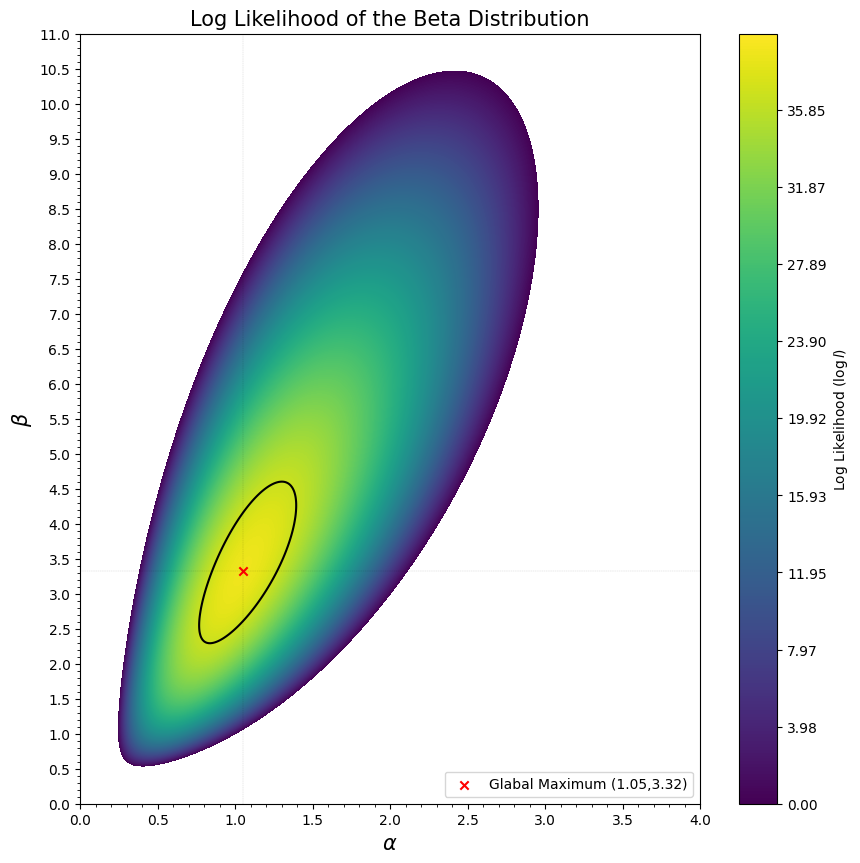

In [147]:
fig, ax = plt.subplots(figsize=(10, 10)) # Create a figure of log likehood in alpha betta space
levels = np.linspace(0, log_likelihood.max()+1, 1000)
contourf_=ax.contourf(alpha, beta, log_likelihood, levels=levels,cmap='viridis', alpha=1,vmin=0, vmax=log_likelihood.max()+1)
ax.set_xlim(0, 4)
ax.set_ylim(0, 11)
ax.set_xlabel(r'$\alpha$', fontsize=15)
ax.set_ylabel(r'$\beta$', fontsize=15)
ax.set_title('Log Likelihood of the Beta Distribution', fontsize=15)

ax.scatter(alpha[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]], beta[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]],marker='x', color='red', label=f'Glabal Maximum ({alpha[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]]:.2f},{beta[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]]:.2f})')
ax.axhline(y=beta[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]], xmin=0, xmax=alpha[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]], color='black',alpha=0.2,lw=0.3, linestyle='--' )
ax.axvline(x=alpha[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]], ymin=0, ymax=beta[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]], color='black',alpha=0.2,lw=0.3, linestyle='--' )

ax.contour(alpha, beta, log_likelihood, levels=[percentile_90], colors='black',linestyle='-',lw=0.2, alpha=1,label='90 % Condifence Interval')

ax.legend(loc='lower right')
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

plt.colorbar(contourf_, label=r'Log Likelihood ($\log{l}$)')

plt.show()

The 90% confidence interval is shown in black contour. Note the negative values for the Log Likelihood are not assigned colours. Due to the large range of values negative as compared to positive. 

### Eccentricity

Normalized histogram of eccentricity and the deduced beta distribution with parameters which maximize the log likelihood.

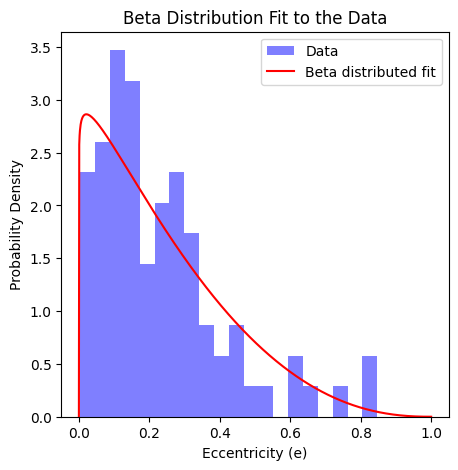

In [150]:
fig, ax = plt.subplots(figsize=(5, 5)) 

ax.hist(cut_data['ECC'], bins=Number_of_bins, density=True, alpha=0.5, color='blue', label='Data')

x = np.linspace(0, 1, 1000)
y = beta_class.pdf(x, Alpha_max, Beta_max)
ax.plot(x, y, color='red', label='Beta distributed fit')

ax.set_xlabel('Eccentricity (e)')
ax.set_ylabel('Probability Density')
ax.set_title('Beta Distribution Fit to the Data')
ax.legend(loc='upper right')

plt.show()


The above density function is fit well with the beta function. However the some bins have higher than predicted by the beta distribution for the fit. Perhaps this can be fixed by taking into account the uncertainties of the binned values. But bootstraping took too long and was computationally challenging, and was not completed. This can be seen in the final cell.

### Further investigation


Further investigation on the population and the bounds were investigated. Different values of lower and upper bound were chosen such that lower bound periodicity ($p_\text{min}$) < upper bound periodicity ($p_\text{max}$). Since the number of points to investigate is large, to save computation point the alpha beta meshgrid was made coarser.

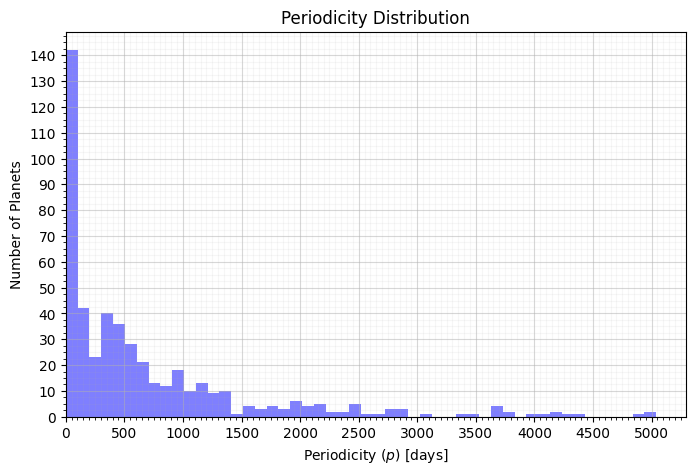

In [180]:
# Periodicity Histogram
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(data_raw['PER'], bins=50, density=False, alpha=0.5, color='blue',histtype='barstacked')
ax.set_xlim(0,)
# ax.vlines(x=200,ymin=0,ymax=100)
# ax.set_xscale('log')
ax.set_xlabel(r'Periodicity ($p$) [days]')
ax.xaxis.set_major_locator(plt.MultipleLocator(500))
ax.xaxis.set_minor_locator(plt.MultipleLocator(50))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.grid(which='major', alpha=0.5)
ax.grid(which='minor', alpha=0.1)

ax.set_ylabel('Number of Planets')
ax.set_title('Periodicity Distribution')
plt.show()




The above plot shows the distribution of all periodicities. There is 44 planets with periodicities greater than 2000 days. The total number of planets is 482. There is a breif dip in bin population around the 200 days mark and a sharp rise. Below the values of $\log{l}$ and the corresponding $\alpha$ and $\beta$ are calculated for different upper and lower bound periodicity.

In [151]:
#Defining the max value and grid spacing
space=0.1 #smaller cause we havae alot to calculate
max_value=7.5

#alpha values
max_value=4
alpha_values = np.linspace(space, max_value, int(max_value/space))

#beta values
max_value=10
beta_values = np.linspace(space, max_value, int(max_value/space))

#creating a meshgrid
alpha, beta = np.meshgrid(alpha_values, beta_values)

print(f'Total number of points in the ({len(alpha_values)},{len(beta_values)}) meshgrid: {len(alpha_values)*len(beta_values)}')



Total number of points in the (40,100) meshgrid: 4000


In [127]:
# all processes above were combined into functions below


def Cut(data,pup,pdown): # cut the data to the selected range
    return data[np.where((data['PER']<=pup) & (data['PER']>=pdown))]

def log_likelihood(Alpha, Beta, data): # calculation  of log likelooh with a mesh grid
    #Calculate the beta distribution
    Beta_dist = beta_class.logpdf(data, Alpha, Beta)

    #Calculate the log likelihood
    log_likelihood = np.sum(Beta_dist)

    return log_likelihood
def log_prior(cut,alpha, beta): # appling the log likelihood onto a cut of data
    log_likelihood = np.zeros((np.shape(alpha)))
    for j in range(len(alpha_values)):
        for i in range(len(beta_values)):
          log_likelihood[i,j] = LogLikelihood(alpha[i,j], beta[i,j], cut['ECC'])
    return log_likelihood

def max_log_likelihood(log_likelihood): #finding the max of log likehood
    Alpha_max=alpha[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]]
    Beta_max=beta[np.where(log_likelihood==np.max(log_likelihood))[0][0],np.where(log_likelihood==np.max(log_likelihood))[1][0]]
    return Alpha_max, Beta_max


In [185]:
# Define p_min and p_max ranges
p_min = np.arange(0, data_raw['PER'].max(), 50)  # p_min values from 0 to periodicity max values in steps of 50
p_max = np.arange(0, data_raw['PER'].max(), 50)  # p_max values from 0 to periodicity max values in steps of 50

#i want smaller steps but it takes too long to calculate :(

In [130]:

# Initialize a 2D array to store the number of planets (or data points)
# Shape is len(p_min) x len(p_max)
N_planets_grid = np.zeros((len(p_min), len(p_max))) # Number of planets 
Alpha_max_grid = np.zeros((len(p_min), len(p_max))) # Alpha_max values 
Beta_max_grid = np.zeros((len(p_min), len(p_max))) # Beta_max values
max_l_grid = np.zeros((len(p_min), len(p_max))) # Maximum log likelihood values
alpha, beta = np.meshgrid(alpha_values, beta_values) # Meshgrid

# Loop over all combinations of p_min and p_max
for i in tqdm(range(len(p_min))):
    min_val	= p_min[i]
    for j, max_val in enumerate(p_max):
        if min_val >= max_val:
            N_planets_grid[i, j] = 0  # Set 0 where p_min > p_max
        else:
            # Cut the data where data is between p_min and p_max
            cut_data = Cut(data_raw, max_val, min_val)
            N_planets_grid[i, j] = len(cut_data)  # Store the length of the cut data
            # Calculate the log likelihood for the cut
            log_likelihood = log_prior(cut_data,alpha, beta)
            Alpha_max, Beta_max = max_log_likelihood(log_likelihood)
            Alpha_max_grid[i, j] = Alpha_max
            Beta_max_grid[i, j] = Beta_max
            max_l_grid[i, j] = log_likelihood.max()


  0%|          | 0/101 [00:00<?, ?it/s]

KeyboardInterrupt: 

The above piece of code takes an hour to run, so i have pickled the arrays and unpickle them as follows:

In [131]:
import pickle #ONLY WORKS IF YOU HAVE THE PICKLED FILE IN THE SAME FOLDER, if so uncomment the following lines
# with open('2d_data.pkl', 'rb') as file:
#     loaded_data = pickle.load(file)
#     Alpha_max_grid=loaded_data['Alpha']
#     Beta_max_grid=loaded_data['Beta']
#     max_l_grid=loaded_data['Log L']
#     alpha=loaded_data['alpha mesh']
#     beta=loaded_data['beta mesh']
#     N_planets_grid=loaded_data['Number']

Visualizing the $\alpha$, $\beta$ as well as the $\log{l}$ values that maximize the log likelihood for each combination of $p_{\text{min}}$ and $p_{\text{max}}$:

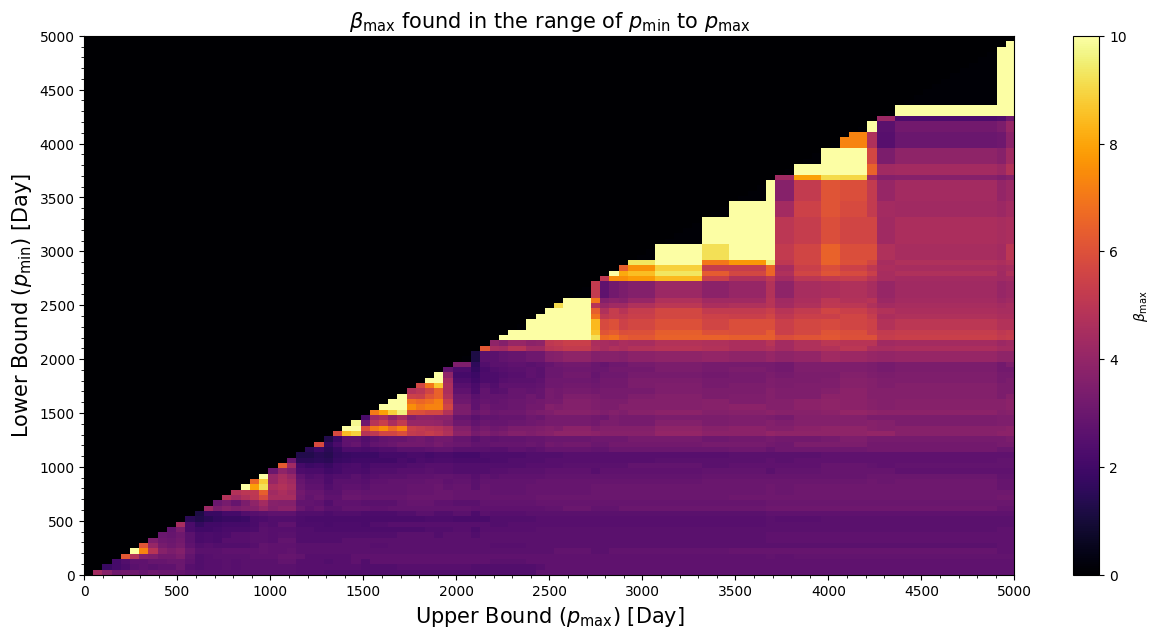

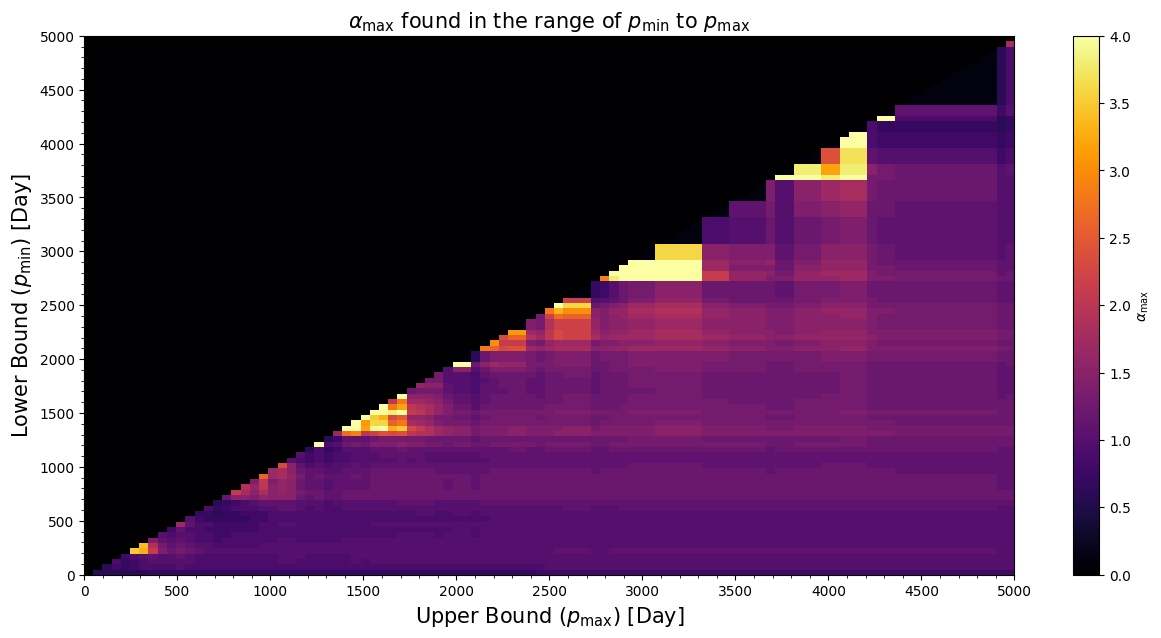

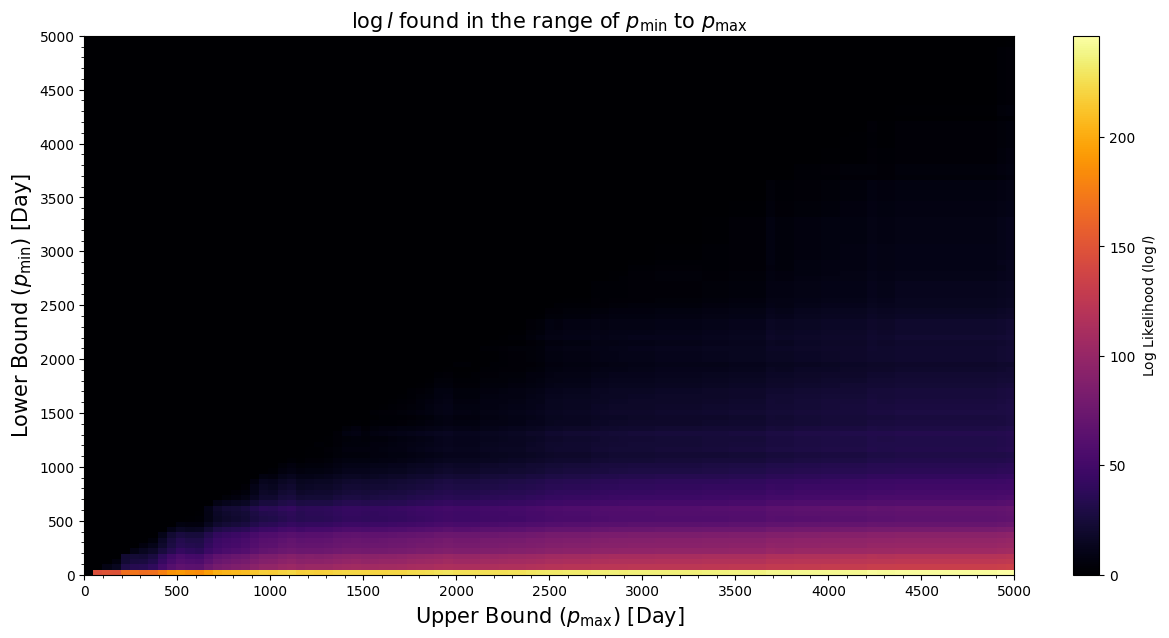

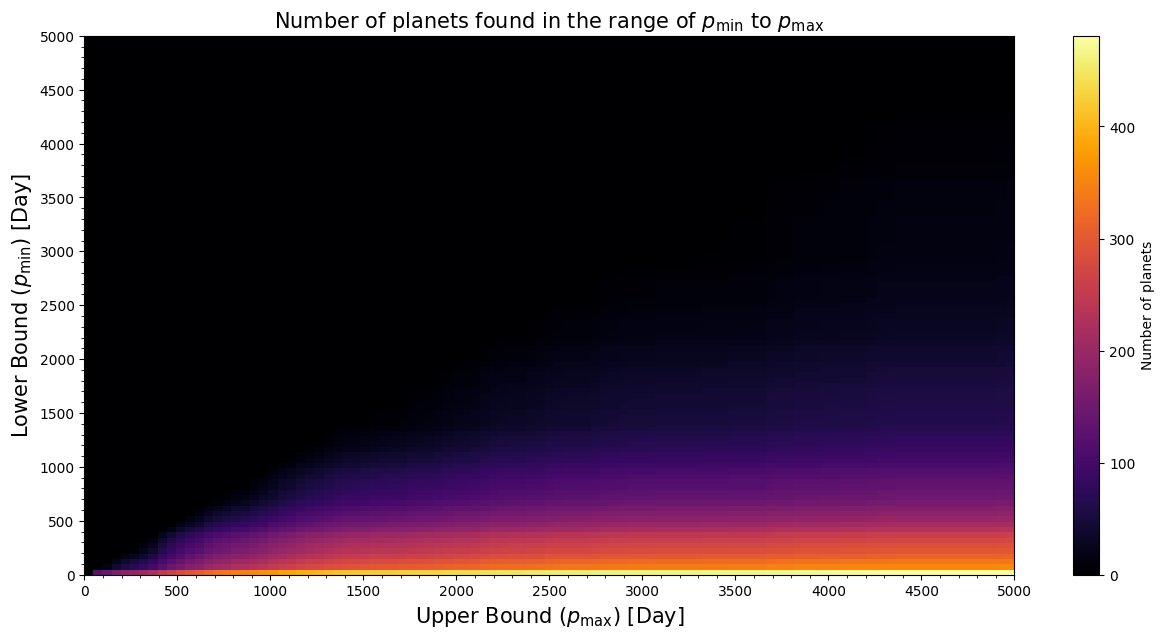

In [135]:
#Functions for visualising the data:
def plot_max_grid(grid, grid_label, title, cmap, p_min, p_max):
    fig, ax = plt.subplots(figsize=(15, 7))
    contourf_ = ax.imshow(grid, cmap=cmap, origin='lower', aspect='auto',
                          extent=[p_min.min(), p_max.max(), p_min.min(), p_max.max()])
    cbar = plt.colorbar(contourf_, label=grid_label)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(r'Upper Bound ($p_\text{max}$) [Day]', fontsize=15)
    ax.set_ylabel(r'Lower Bound ($p_\text{min}$) [Day]', fontsize=15)
    ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
    ax.xaxis.set_major_locator(plt.MultipleLocator(500))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(100))
    ax.yaxis.set_major_locator(plt.MultipleLocator(500))
    plt.show()

def plot_grids(Beta_max_grid, Alpha_max_grid, max_l_grid,N_planets, p_min, p_max):
    plot_max_grid(Beta_max_grid, r'$\beta_\text{max}$', 
                  r'$\beta_\text{max}$ found in the range of $p_\text{min}$ to $p_\text{max}$', 
                  plt.get_cmap('inferno'), p_min, p_max)
    
    plot_max_grid(Alpha_max_grid, r'$\alpha_\text{max}$', 
                  r'$\alpha_\text{max}$ found in the range of $p_\text{min}$ to $p_\text{max}$', 
                  plt.get_cmap('inferno'), p_min, p_max)
    
    plot_max_grid(max_l_grid, r'Log Likelihood ($\log{l}$)', 
                  r'$\log{l}$ found in the range of $p_\text{min}$ to $p_\text{max}$', 
                  plt.get_cmap('inferno'), p_min, p_max)
    plot_max_grid(N_planets, r'Number of planets',r'Number of planets found in the range of $p_\text{min}$ to $p_\text{max}$', 
                  plt.get_cmap('inferno'), p_min, p_max)

# Plotting the data
plot_grids(Beta_max_grid, Alpha_max_grid, max_l_grid,N_planets_grid, p_min, p_max) #plots beta,alpha, loglikelihood and number of planets on 2D grid

The $\beta$ and $\alpha$ tends to be unstable for large values of $p_\text{min}$ with the addition of when $p_\text{max}$ is close to the lower bound. This is because the tail end of the periodicity distribution is investigated when $p_\text{min}$ is large leading to a lack of data points to provide statistically significant amount to constrain the parameters which maximize the log likelihood. For $p_\text{min}>2000$ the maximum number of planets that exists for an unbounded upper bound is <10% (44) of the total population. This recreated the effects seen in the $p_\text{min}=p_\text{max}$ line. There just isnt enough population size to reproduce a sharp global maximum. Furthermore as expected from the $\log{l}$ derivation, $\log{l}$ increases when there are more data points. The final plot above shows that there are more data poins for lower values of the $p_\text{min}$ and concurrently maximized when $p_\text{max}$ is largest. These regions also recreate the largest values of $\log{l}$ seen in the second to last plot. Small variations of number of planets also seem to occur in the same regions as instable regions of $\beta$ and $\alpha$ parameter space as seen in first two plots further confirming the low statistically significant population effect. 

The $\beta_\text{max}$ and $\alpha_\text{max}$ are the parameters that maximize the log likelihood. The distribution of these values at different number of planets is plotted below.

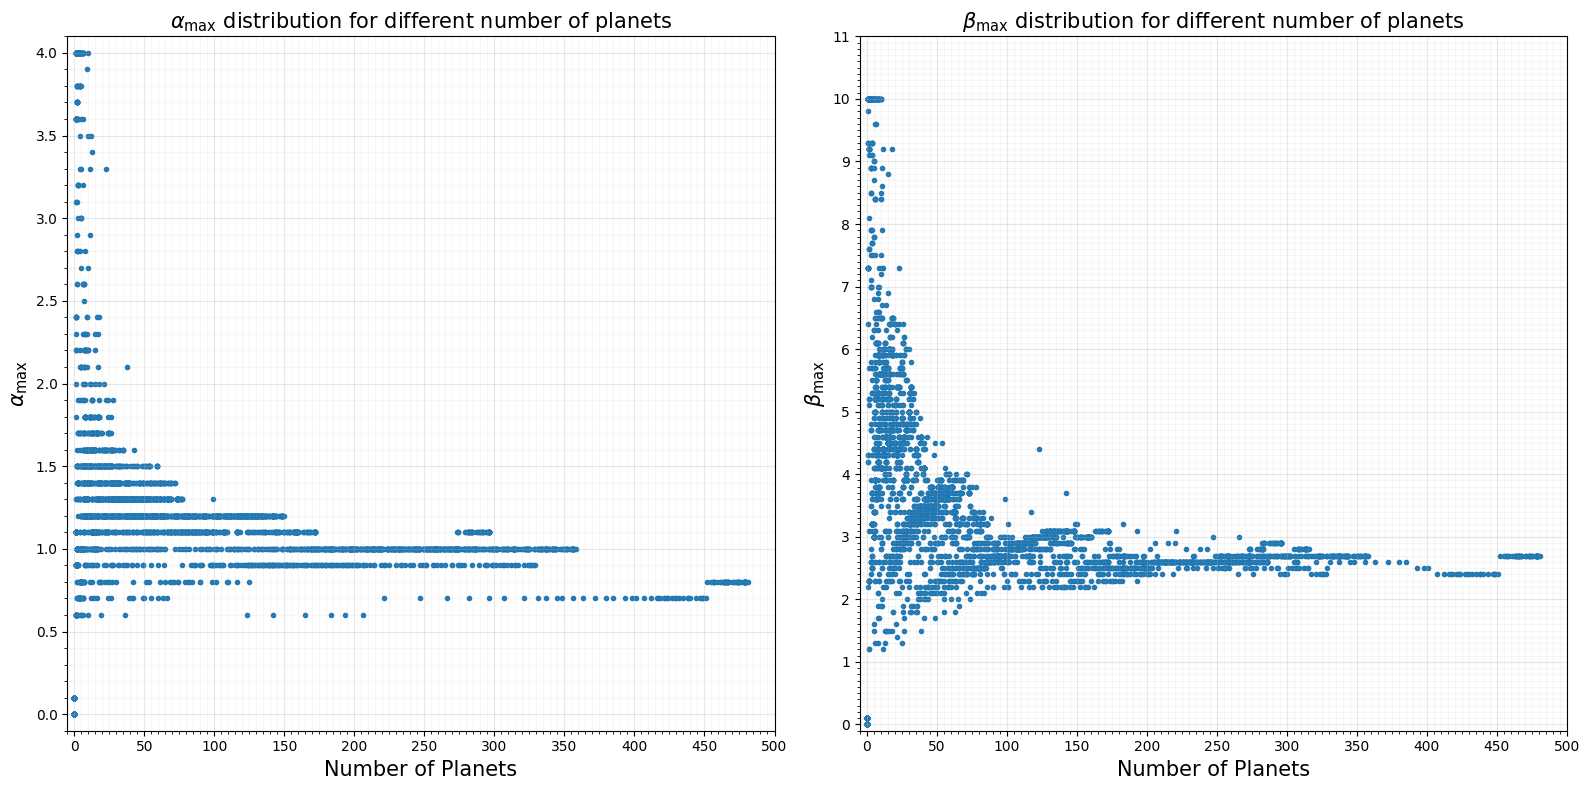

In [113]:
def plot_planets_vs_alpha_beta(N_planets_grid, Alpha_max_grid, Beta_max_grid):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 

    # Scatterplot for Alpha_max vs. number of planets
    ax[0].scatter(N_planets_grid, Alpha_max_grid, marker='.')
    ax[0].set_xlabel('Number of Planets',fontsize=15)
    ax[0].set_ylabel(r'$\alpha_\text{max}$', fontsize=15)
    ax[0].set_title(r'$\alpha_\text{max}$ distribution for different number of planets',fontsize=15)
    ax[0].xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax[0].xaxis.set_major_locator(plt.MultipleLocator(50))
    ax[0].yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax[0].yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax[0].set_xlim(-5, 500)
    ax[0].set_ylim(-0.1, 4.1)
    ax[0].grid(which='major',alpha=0.3)
    ax[0].grid(which='minor', alpha=0.1)

    # Scatterplot for Beta_max vs number of planets
    ax[1].scatter(N_planets_grid, Beta_max_grid, marker='.')
    ax[1].set_xlabel('Number of Planets', fontsize=15)
    ax[1].set_ylabel(r'$\beta_\text{max}$', fontsize=15)
    ax[1].set_title(r'$\beta_\text{max}$ distribution for different number of planets', fontsize=15)
    ax[1].xaxis.set_minor_locator(plt.MultipleLocator(5))
    ax[1].xaxis.set_major_locator(plt.MultipleLocator(50))
    ax[1].yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax[1].yaxis.set_major_locator(plt.MultipleLocator(1))
    ax[1].set_xlim(-5, 500)
    ax[1].set_ylim(-0.1, 11)
    ax[1].grid(which='major',alpha=0.3)
    ax[1].grid(which='minor', alpha=0.1)

    plt.tight_layout() 
    plt.show()

# Call the function with the corresponding data
plot_planets_vs_alpha_beta(N_planets_grid, Alpha_max_grid, Beta_max_grid)

It can be seen that, just as before,  that for small number of planets there is a large distribution of potential $\beta_\text{max}$ and $\alpha_\text{max}$ values suggeting flat maximum and too little statistically significant datapoints. As the number of planets increase the $\beta_\text{max}$ and $\alpha_\text{max}$ values converge to a single value. However in the $\alpha_\text{max}$, it is noticed that beyond 200 planets there is a jump to a lower $\alpha_\text{max}$ value and becomes significant if the number of planets in the range increases beyond 350. The $\log{l}$ is plotted below to investigate if it exhibits a jump in values as well. 

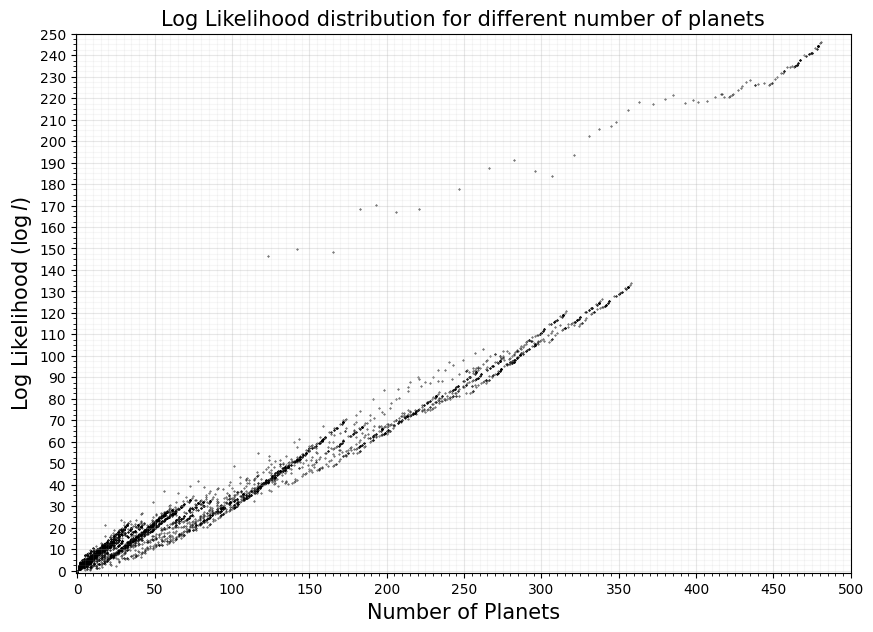

In [106]:
fig, ax= plt.subplots(figsize=(10,7))

ax.scatter(N_planets_grid,max_l_grid,marker='.',s=0.5,color='black')
ax.set_xlabel('Number of Planets',fontsize=15)
ax.set_ylabel(r'Log Likelihood ($\log{l}$)',fontsize=15)
ax.set_title(r'Log Likelihood distribution for different number of planets',fontsize=15)
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2.5))
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_xlim(-1, 500)
ax.set_ylim(-1, 250)
ax.grid(which='major',alpha=0.3)
ax.grid(which='minor', alpha=0.1)
plt.show()



It can be seen that there are two groups of $\log{l}$ occuring. The biggest of which extends form 0 to ~350 planets. While the second group which is shifted higher but follows the same linear trend start ~150 plents and extends to >450 while becoming the dominant of the two groups at ~350 planets. One possible suggestion for such a jump is the incluesion of large data points from the tail end of the total distribution which are too sparsly separated.

## Conclusions

*Draw some conclusions (statistical, physical, or both) from what you have found*

Explonets travel in eliptical orbits with nonzero eccentiricities. There were $e=0$ values in the provided data  set which is below the detection threshold. Since $e=0$ is theoretically not possible due to kepler's second law, all values were replaced with detection minimum and it's associated uncertainty. This was detector effects would not affect the overall distribution of eccentricities. Further more a small cut in periodicities was made between [150,400] days to select 84 planets and the corresponding eccentricities. The distribution was binned and normalized to get the density distribution. The desity distribution is said to be well described by a beta distribution. To find the best $\alpha$ and $\beta$ values of the normalized distribution of eccentricities, a maximum likelihood function was constructed. Log likehood was maximized at $\alpha=$ 1.05 and $\beta$ = 3.31. The 90th percentile was also calculated and over plotted using Wilkes theorem.

Furthermore investigation on different bounds of periodicity and the number of data points to estimate the $\alpha$ and $\beta$ which maximize the Log Likelihood. It can be seen that lower number of planets make the log likehood unstable providing a larger variance of potential $\beta_\text{max}$ and $\alpha_\text{max}$ values. When the Number of points incerases the confidince of the $\beta_\text{max}$ and $\alpha_\text{max}$ values increases leading to convergence set of $\beta_\text{max}$ and $\alpha_\text{max}$ values. However when the distribution got too big, the normalized beta distribution parameter $\alpha_\text{max}$ started diverging once more. The jump is also seen in the $\log{l}$ and is potentially caused by sparse tail end distribution for large periodicity.

## Statement on GAI use

I only have copilot activated on my VS code which provides me with autofilling long codes. I have not generated code or text where I type in what I want. Only AI with capability to predict the paramenters of a function.

## Attempt At bootstraping

Below does not work very fast so i gave up after i needed 12 hours to compute it. But is fun to look at my trying to use the uncertainties to get a better histogram and fit and propogate the uncertainties to the $\alpha$ and $\beta$. Ideally I would like to resample the $P,e$ space with 2d gaussian distribution and fit the beta distribution to the resampled distribution. The values for $\alpha_\text{max}$ and $\beta_\text{max}$ would be identified with confidence interval and contain the uncertainties. Resampling would be run until the difference in maximizing parameters move less than 0.01% of the previous itteration.... 

In [ ]:
#Making laptop go BZZZZ
# @jit(nopython=True)
def resample(data_raw,n_samples = 1000):
    

    #Number of data points
    n_points = len(data_raw['PER'])

    #Storing the the boostrap sample
    bootstrap_samples = np.zeros((n_samples, 2,n_points))

    for i in tqdm(range(n_samples)):
        #Creating replacing sampling
        periodicity_resampling=np.random.normal(data_raw['PER'],data_raw['UPER'])
        Eccentricity_resampling= np.random.normal(data_raw['ECC'],data_raw['UECC'])
        #lower bound for the resmapled eccentricity to be no lower or equal to 0
        for j in range(len(Eccentricity_resampling)):
            while Eccentricity_resampling[j]<=0.0:
                Eccentricity_resampling[j]=np.random.normal(data_raw['ECC'][j],data_raw['UECC'][j])
        
        
        #Storing the boostrap sample
        bootstrap_samples[i,0,:] = periodicity_resampling
        bootstrap_samples[i,1,:] = Eccentricity_resampling
    return bootstrap_samples
Resampled=resample(data_raw=data_raw,n_samples = 1000)
def cuting(Resampled,P_min=150,P_max=400):
    resampled=[]
    for i in range(len(Resampled)):
        per,ucc=Resampled[i]
        

        periodicity_range= (per>=P_min) & (per<=P_max)
        # print(f'Total number of exoplanets in the period range [{P_min},{P_max}]: ',len(per[periodicity_range]))
        per=per[periodicity_range]
        ucc=ucc[periodicity_range]
        resampled.append((per,ucc))
    return resampled

resampled=cuting(Resampled)

def LogLikelihood(Alpha, Beta, data):
    return np.sum(beta_class.logpdf(data, Alpha, Beta))
from multiprocessing.pool import ThreadPool as Pool
import time as time
def fun():
    TIME=0
    # from multiprocessing import Pool
    log_likelihood = np.zeros((len(resampled),np.shape(alpha)[0],np.shape(alpha)[1]))
    pool_size = 12  # your "parallelness"
    Time=0
    # define worker function before a Pool is instantiated
    def worker(k):
        nonlocal TIME
        time_start = time.time()
        for j in (range(len(alpha_values))):
            for i in range(len(beta_values)):
                log_likelihood[k,i,j] = LogLikelihood(alpha[i,j], beta[i,j], resampled[k][1])
        time_end = time.time()
        if TIME==0:
            TIME+=time_end-time_start
        else:
            TIME=(Time+time_end-time_start)/2
        print(f' average time per sample: {Time} min')
    pool = Pool(pool_size)

    for k in range(len(resampled)):
        pool.apply_async(worker, (k,))

    pool.close()
    pool.join()



    return log_likelihood

fun()